# Homework 3
#### submitted by: Amin Shojaeighadikolaei   Mar-24-2020


###### Question: Implement a Multilayer Perceptron model with the Backpropagation algorithm using only NumPy and no other module.

- data is the same as in Homework 2
- 3 layers, 800 neurons in each hidden layer, ReLU activations and softmax in the last layer
- batchsize=30 and shuffle before each epoch
- test as in Homework 2 and show the results

In this homework we want to design a Neural Network with Backpropagation algorithm in which we just using Numpy module. Based on the question, the Network is 3 layer which means has 2 hidden layer each has 800 neurons. The dataset is mnist148.nbz which is consist of 300 sample of handwriting images and 3 image for test. In hence, the input size is (300*28*28) , output size is (300*1) and test size is (3*28*28). At first I want to import the libraries and then I will write the functions for Neural Network. 

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:


class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
        self.once = True
 
 
    def activation_function(self,type, x , derivation):
        if type == "Sigmoid" :
            if derivation == False:
                return 1 / (1 + np.exp(-x))
            else:
                s = 1 / (1 + np.exp(-x))
                return s * (1 - s)

        if type == "ReLU":
            if derivation == False:
                return x * (x > 0)
            else:
                return 1. * (x > 0)

        if type == "Softmax":
            expZ = np.exp(x - np.max(x))
            return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.activation_function("ReLU" ,Z, derivation=False)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.activation_function( "Softmax",Z , derivation= False)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
   
 
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.activation_function( "ReLU", store["Z" + str(l)] , derivation = True)
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def train(self, X, Y, learning_rate=0.01, n_iterations=1):
        np.random.seed(1)
 
        self.n = X.shape[0]
        
        if self.once == True :
            self.layers_size.insert(0, X.shape[1])
            self.once = False
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
 
 
 

Now I want to load dataset:

In [3]:
dataset= np.load(r'C:\Users\a335s717\Desktop\HW2\mnist148.npz')
new_dataset= dataset.files
X = dataset['arr_0']
Y = dataset['arr_1']
Test = dataset['arr_2']

print("Input size is: ", X.shape)
print("Output size is: ", Y.shape)
print("Test size is: ", Test.shape)
print("the first 10 samples of output is: ", Y[0:10])

Input size is:  (300, 28, 28)
Output size is:  (300,)
Test size is:  (3, 28, 28)
the first 10 samples of output is:  [4 1 1 1 4 1 8 4 1 1]


Next step is preparing the dataset. 
- the first thing is the size of the input which is (28*28) for each sample and we should change it to 784.
- Next is the output value which is 1,4 or 8. this is categorical output and we have to use onehot encoding method to change the output.
- Normalizing the input and output is the last thing that I want to do for preparing the dataset.

In [4]:
Input = []
Output=[]
count = np.zeros((10))
w = np.random.random((28 * 28, 3))
for x, y in zip(X,Y):
    if y in [1, 4, 8]:
        Input.append(x.reshape((28 * 28)) / 255)
        count[y] += 1
        
        if y == [1]:
            y = [1, 0, 0]
        elif y == [4]:
            y = [0, 1, 0]
        elif y == [8]:
            y = [0, 0, 1]   
        Output.append(y)
x_test=[]
for x in Test : # reshape and normalize data
    x_test.append(x.reshape((28 * 28)) / 255)

samples = np.asarray(Input)
labels = np.asarray(Output)
test = np.asarray(x_test)

X_train = samples
Y_train = labels
X_Test = test

print("train input size: " + str(X_train.shape))
print("Train Output size: "+ str(Y_train.shape))
print("Test Input size: " + str(X_Test.shape))
print(" the first 10 sample for output is: ", Y_train[0:10])

train input size: (300, 784)
Train Output size: (300, 3)
Test Input size: (3, 784)
 the first 10 sample for output is:  [[0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]]


Now the dataset is prepared and I want to use the functions of the Neural Network to create a NN for the dataset. At first I define the number of layers and nodes. Based on the question, the NN should be 3 layers which means 1 input layer, 2 hidden layer( 800 nodes in each) and 1 output layer( which is 3 nodes- because the out put is 3 base on one hot coding) 

In [5]:
layers_nodes = [800 ,800, 3] # how many nodes for hidden layers and output layer is needed


In [6]:
ann = ANN(layers_nodes)    # Create the Neural network.

Now the Neural network is created and it consists of 784 nodes for input, 800 nodes for first hidden layer, 800 nodes for second hidden layer and 3 nodes for output. In next I want to train the Neural network but before that based on the question I hava to shuffle the dataset and select a batch of data instead of training the dataset with the all 300 samples. in hence, 3 parameters have to be defined. 

- Epoch: One epoch is when all data samples train through NN.
- iteration: number of iteration is number of passes, each pass using [batchsize] number of examples.
- Batchsize: The number of training examples in one forward/backward pass.

Just note that before each epoch the dataset will shuffle and then 10 batchsize will select in which each batchsize is consisting of 30 images.

In [7]:
epoch = 10
iteration = 100
batchsize = 30

for i in range(epoch):  # number of epoch
    print("epoch: ", i)

    # Shuffle dataset before going to trainig
    s = np.arange(X_train.shape[0]) 
    np.random.shuffle(s)
    X_train= X_train[s]
    Y_train = Y_train[s]
    zzz = X_train.shape[0]

    for i in range(0, X_train.shape[0],batchsize): # select a batch of data 
        XX_train = X_train[i:i+batchsize]
        YY_train = Y_train[i:i+batchsize]
        ann.train(XX_train, YY_train, learning_rate=0.1, n_iterations = iteration)

    

epoch:  0
Cost:  0.3647747973326185 Train Accuracy: 50.0
Cost:  0.37351428400254233 Train Accuracy: 53.333333333333336
Cost:  0.37449102210229523 Train Accuracy: 73.33333333333333
Cost:  0.3651801345834054 Train Accuracy: 43.333333333333336
Cost:  0.3699372168579389 Train Accuracy: 73.33333333333333
Cost:  0.3636233866144339 Train Accuracy: 73.33333333333333
Cost:  0.36651467893414796 Train Accuracy: 73.33333333333333
Cost:  0.3699229462128367 Train Accuracy: 83.33333333333334
Cost:  0.364851742303374 Train Accuracy: 60.0
Cost:  0.3673345729895209 Train Accuracy: 50.0
epoch:  1
Cost:  0.369788738247831 Train Accuracy: 63.33333333333333
Cost:  0.37023919177802755 Train Accuracy: 60.0
Cost:  0.36878824710470737 Train Accuracy: 86.66666666666667
Cost:  0.3719191449304808 Train Accuracy: 83.33333333333334
Cost:  0.3692957116891771 Train Accuracy: 76.66666666666667
Cost:  0.37047784365167963 Train Accuracy: 76.66666666666667
Cost:  0.37053103310769514 Train Accuracy: 56.666666666666664
Cost

In [8]:
print("Train Accuracy:", ann.predict(X_train, Y_train))
# print("Test Accuracy:", ann.predict(test_x, test_y))
test , storage = ann.forward(X_Test)
print("Predicted output: "+ str(test))

Train Accuracy: 91.33333333333333
Predicted output: [[9.97249387e-01 6.93837154e-03 4.62578470e-02]
 [3.12329122e-04 9.37567067e-01 5.48170766e-03]
 [2.43828347e-03 5.54945616e-02 9.48260445e-01]]


predicted class for sample 1 is:  1
predicted class for sample 2 is:  4
predicted class for sample 3 is:  8


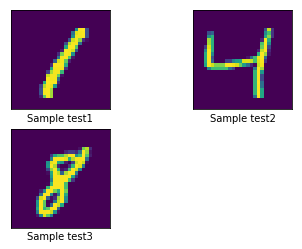

In [9]:
for c in range(3):
    plt.subplot(2,2,c+1)
    plt.imshow(Test[c])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Sample test'+str(c+1))
    
for i in range(3):
    if np.argmax(test[i]) == 0: print("predicted class for sample " + str(i+1) + ' is: ',  1)
    if np.argmax(test[i]) == 1: print('predicted class for sample ' +str(i+1)+ ' is: ',  4)
    if np.argmax(test[i]) == 2: print('predicted class for sample ' +str(i+1)+ ' is: ',  8)
